In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

cur_dir = os.getcwd()
df = pd.read_csv(cur_dir + '/../data/train_set_artificial.csv', low_memory=False)

In [2]:
df

,carrier,origin,dest,air_time,distance,Maximum,Minimum,Average,Departure,Precipitation,New Snow,Snow Depth,days_in_365,sched_time_in_min,Precipitation Binary,New Snow Binary,Snow Depth Binary,delay_class
0,DL,JFK,MCO,0.170370,0.176219,0.358025,0.346667,0.350649,0.418301,0.000000,0.0,0.0,0.917582,0.316067,yes,no,no,no
1,EV,EWR,MCI,0.229630,0.206404,0.407407,0.333333,0.370130,0.254902,0.000000,0.0,0.0,0.840659,0.374012,yes,no,no,no
2,B6,JFK,MSY,0.232593,0.224760,0.308642,0.293333,0.298701,0.241830,0.000000,0.0,0.0,0.250000,0.087796,no,no,no,no
3,B6,EWR,FLL,0.195556,0.200897,0.506173,0.493333,0.500000,0.459695,0.000000,0.0,0.0,0.274725,0.579456,yes,no,no,yes
4,WN,LGA,BNA,0.130370,0.139506,0.691358,0.773333,0.733766,0.250545,0.004988,0.0,0.0,0.530220,0.267779,yes,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293895,EV,LGA,CLE,0.059259,0.069141,0.545426,0.573333,0.559607,0.334357,0.000000,0.0,0.0,0.773058,0.805970,yes,no,no,yes
293896,B6,JFK,ROC,0.057778,0.037927,0.259259,0.213333,0.233766,0.385621,0.000000,0.0,0.0,0.000000,0.935031,no,no,no,yes
293897,B6,JFK,SJU,0.278015,0.309606,0.672717,0.641133,0.659579,0.574152,0.000000,0.0,0.0,0.779986,0.878921,yes,no,no,yes
293898,AA,LGA,DFW,0.238519,0.265588,0.619803,0.696054,0.658494,0.295969,0.285698,0.0,0.0,0.439560,0.763476,yes,no,no,yes


In [3]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'delay_class']
y = df['delay_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

train_set = X_train.join(y_train)
val_set = X_val.join(y_val)
test_set = X_test.join(y_test)

In [4]:
train_set

,carrier,origin,dest,air_time,distance,Maximum,Minimum,Average,Departure,Precipitation,New Snow,Snow Depth,days_in_365,sched_time_in_min,Precipitation Binary,New Snow Binary,Snow Depth Binary,delay_class
168469,B6,JFK,SAN,0.454815,0.482562,0.432099,0.453333,0.441558,0.298475,0.000000,0.0,0.0,0.810440,0.624232,yes,no,no,no
209968,B6,JFK,MCO,0.157027,0.176219,0.771565,0.760000,0.769460,0.379736,0.000000,0.0,0.0,0.588769,0.601573,no,no,no,yes
63549,DL,EWR,ATL,0.114074,0.135835,0.617284,0.573333,0.597403,0.335512,0.000000,0.0,0.0,0.739011,0.763828,no,no,no,no
130160,UA,EWR,LAX,0.435556,0.484193,0.555556,0.533333,0.545455,0.385621,0.000000,0.0,0.0,0.326923,0.070237,yes,no,no,no
258577,MQ,JFK,DCA,0.072218,0.070468,0.814815,0.693333,0.759740,0.612200,0.000000,0.0,0.0,0.409341,0.762769,no,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51866,B6,EWR,FLL,0.170370,0.200897,0.345679,0.240000,0.292208,0.320261,0.000000,0.0,0.0,0.200549,0.891133,no,no,no,yes
266174,EV,JFK,BOS,0.040481,0.037804,0.452785,0.381984,0.417691,0.262028,0.000000,0.0,0.0,0.813187,0.910593,no,no,no,yes
268730,UA,EWR,IAH,0.227736,0.204508,0.592593,0.600000,0.597403,0.180828,0.321696,0.0,0.0,0.447802,0.221947,yes,no,no,yes
246225,B6,JFK,SJU,0.267732,0.309606,0.774961,0.764209,0.773296,0.457401,0.000000,0.0,0.0,0.665221,0.852535,no,no,no,yes


In [5]:
from sklearn.preprocessing import OneHotEncoder

# Transform categorical features into binary features
categorical_columns = list(X_train.select_dtypes(include=['object']).columns)
encoder = OneHotEncoder()

# Use X to fit the encoder to prevent scenarios that the binary features in train and test sets are different, 
# For example, test set has dest_LAX, but train set does not have dest_LAX
encoder.fit(X[categorical_columns])

X_train_category = encoder.transform(X_train[categorical_columns])
X_test_category = encoder.transform(X_test[categorical_columns])

# Get numerical features
numerical_columns = list(X_train.select_dtypes(include=['float64']).columns)

# Combine the numerical and categorical features
X_train_df_category = pd.DataFrame(X_train_category.toarray())
X_train_df_category.columns = encoder.get_feature_names_out()
X_train_df_numerical = pd.DataFrame(X_train[numerical_columns]).reset_index(drop=True)
X_train_encoded = pd.concat([X_train_df_numerical, X_train_df_category], axis=1)


X_test_df_category = pd.DataFrame(X_test_category.toarray())
X_test_df_category.columns = encoder.get_feature_names_out()
X_test_df_numerical = pd.DataFrame(X_test[numerical_columns]).reset_index(drop=True)
X_test_encoded = pd.concat([X_test_df_numerical, X_test_df_category], axis=1)

In [6]:
X_train_encoded

,air_time,distance,Maximum,Minimum,Average,Departure,Precipitation,New Snow,Snow Depth,days_in_365,...,dest_TUL,dest_TVC,dest_TYS,dest_XNA,Precipitation Binary_no,Precipitation Binary_yes,New Snow Binary_no,New Snow Binary_yes,Snow Depth Binary_no,Snow Depth Binary_yes
0,0.454815,0.482562,0.432099,0.453333,0.441558,0.298475,0.000000,0.0,0.0,0.810440,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.157027,0.176219,0.771565,0.760000,0.769460,0.379736,0.000000,0.0,0.0,0.588769,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.114074,0.135835,0.617284,0.573333,0.597403,0.335512,0.000000,0.0,0.0,0.739011,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.435556,0.484193,0.555556,0.533333,0.545455,0.385621,0.000000,0.0,0.0,0.326923,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.072218,0.070468,0.814815,0.693333,0.759740,0.612200,0.000000,0.0,0.0,0.409341,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176335,0.170370,0.200897,0.345679,0.240000,0.292208,0.320261,0.000000,0.0,0.0,0.200549,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
176336,0.040481,0.037804,0.452785,0.381984,0.417691,0.262028,0.000000,0.0,0.0,0.813187,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
176337,0.227736,0.204508,0.592593,0.600000,0.597403,0.180828,0.321696,0.0,0.0,0.447802,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
176338,0.267732,0.309606,0.774961,0.764209,0.773296,0.457401,0.000000,0.0,0.0,0.665221,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [7]:
X_test_encoded

,air_time,distance,Maximum,Minimum,Average,Departure,Precipitation,New Snow,Snow Depth,days_in_365,...,dest_TUL,dest_TVC,dest_TYS,dest_XNA,Precipitation Binary_no,Precipitation Binary_yes,New Snow Binary_no,New Snow Binary_yes,Snow Depth Binary_no,Snow Depth Binary_yes
0,0.196399,0.207220,0.567901,0.533333,0.551948,0.398942,0.000000,0.0,0.0,0.323445,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.272593,0.266979,0.592593,0.586667,0.590909,0.570806,0.002494,0.0,0.0,0.837912,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.266667,0.314093,0.641975,0.613333,0.629870,0.191721,0.000000,0.0,0.0,0.681319,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.115556,0.131552,0.567901,0.413333,0.493506,0.291939,0.000000,0.0,0.0,0.329670,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.180741,0.176219,0.308642,0.280000,0.292208,0.217865,0.000000,0.0,0.0,0.255495,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58775,0.281481,0.309606,0.617284,0.586667,0.603896,0.254902,0.000000,0.0,0.0,0.703297,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
58776,0.063704,0.066082,0.580247,0.506667,0.545455,0.396514,0.000000,0.0,0.0,0.785714,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
58777,0.093822,0.105620,0.604938,0.573333,0.590909,0.285403,0.129676,0.0,0.0,0.403846,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
58778,0.205512,0.202116,0.333333,0.293333,0.311688,0.464052,0.039900,0.0,0.0,0.134615,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier()
param_grid = {
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [70, 80, 90, 100]
}
grid_search = GridSearchCV(decision_tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train_encoded, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

tuned_tree = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],
                                    max_depth=grid_search.best_params_['max_depth'],
                                    min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
tuned_tree.fit(X_train_encoded, y_train)
accuracy = tuned_tree.score(X_test_encoded, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 80}
Accuracy: 66.04%


In [9]:
from sklearn.metrics import confusion_matrix

y_pred = tuned_tree.predict(X_test_encoded)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[22871  6657]
 [13303 15949]]


In [10]:
from sklearn import tree

# fig = plt.figure()
# _ = tree.plot_tree(tuned_tree, 
#                    feature_names=X_train_encoded.columns.values,  
#                    class_names=y_train.unique(),
#                    filled=True)
# fig.savefig("decistion_tree.pdf")

In [11]:
# Post Pruning
from sklearn.metrics import accuracy_score

path = tuned_tree.cost_complexity_pruning_path(X_train_encoded, y_train)
ccp_alphas = path.ccp_alphas

best_accuracy = 0
best_tree = None
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],
                                    max_depth=grid_search.best_params_['max_depth'],
                                    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                    ccp_alpha=ccp_alpha)
    pruned_tree.fit(X_train_encoded, y_train)
    y_pred = pruned_tree.predict(X_test_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_tree = pruned_tree

In [12]:
print("Accuracy: {:.2f}%".format(best_accuracy * 100))

Accuracy: 66.08%


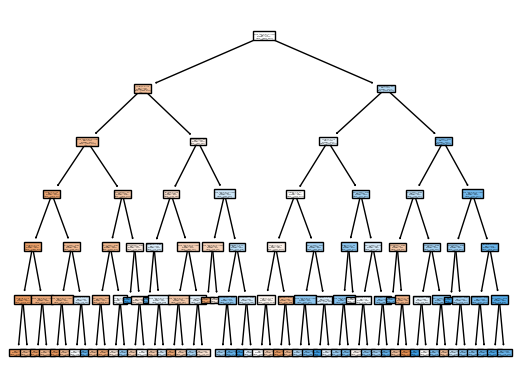

In [13]:
fig = plt.figure()
_ = tree.plot_tree(best_tree, 
                   feature_names=X_train_encoded.columns.values,  
                   class_names=y_train.unique(),
                   filled=True)
fig.savefig("pruned_decistion_tree.pdf")

In [14]:
y_pred = best_tree.predict(X_test_encoded)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[22795  6733]
 [13203 16049]]
